Convert File from PDF to CSV. Lateral Certifications in the Rhode Island Municipal Police Training Academy.

In [370]:
from pdf2image import convert_from_path
import easyocr
import numpy as np
import PIL
from PIL import ImageDraw
import spacy
import pandas as pd

In [371]:
reader = easyocr.Reader(['en'])

In [372]:
images = convert_from_path('RIMPTA_-_Lateral_certifications_list_Redacted.pdf')

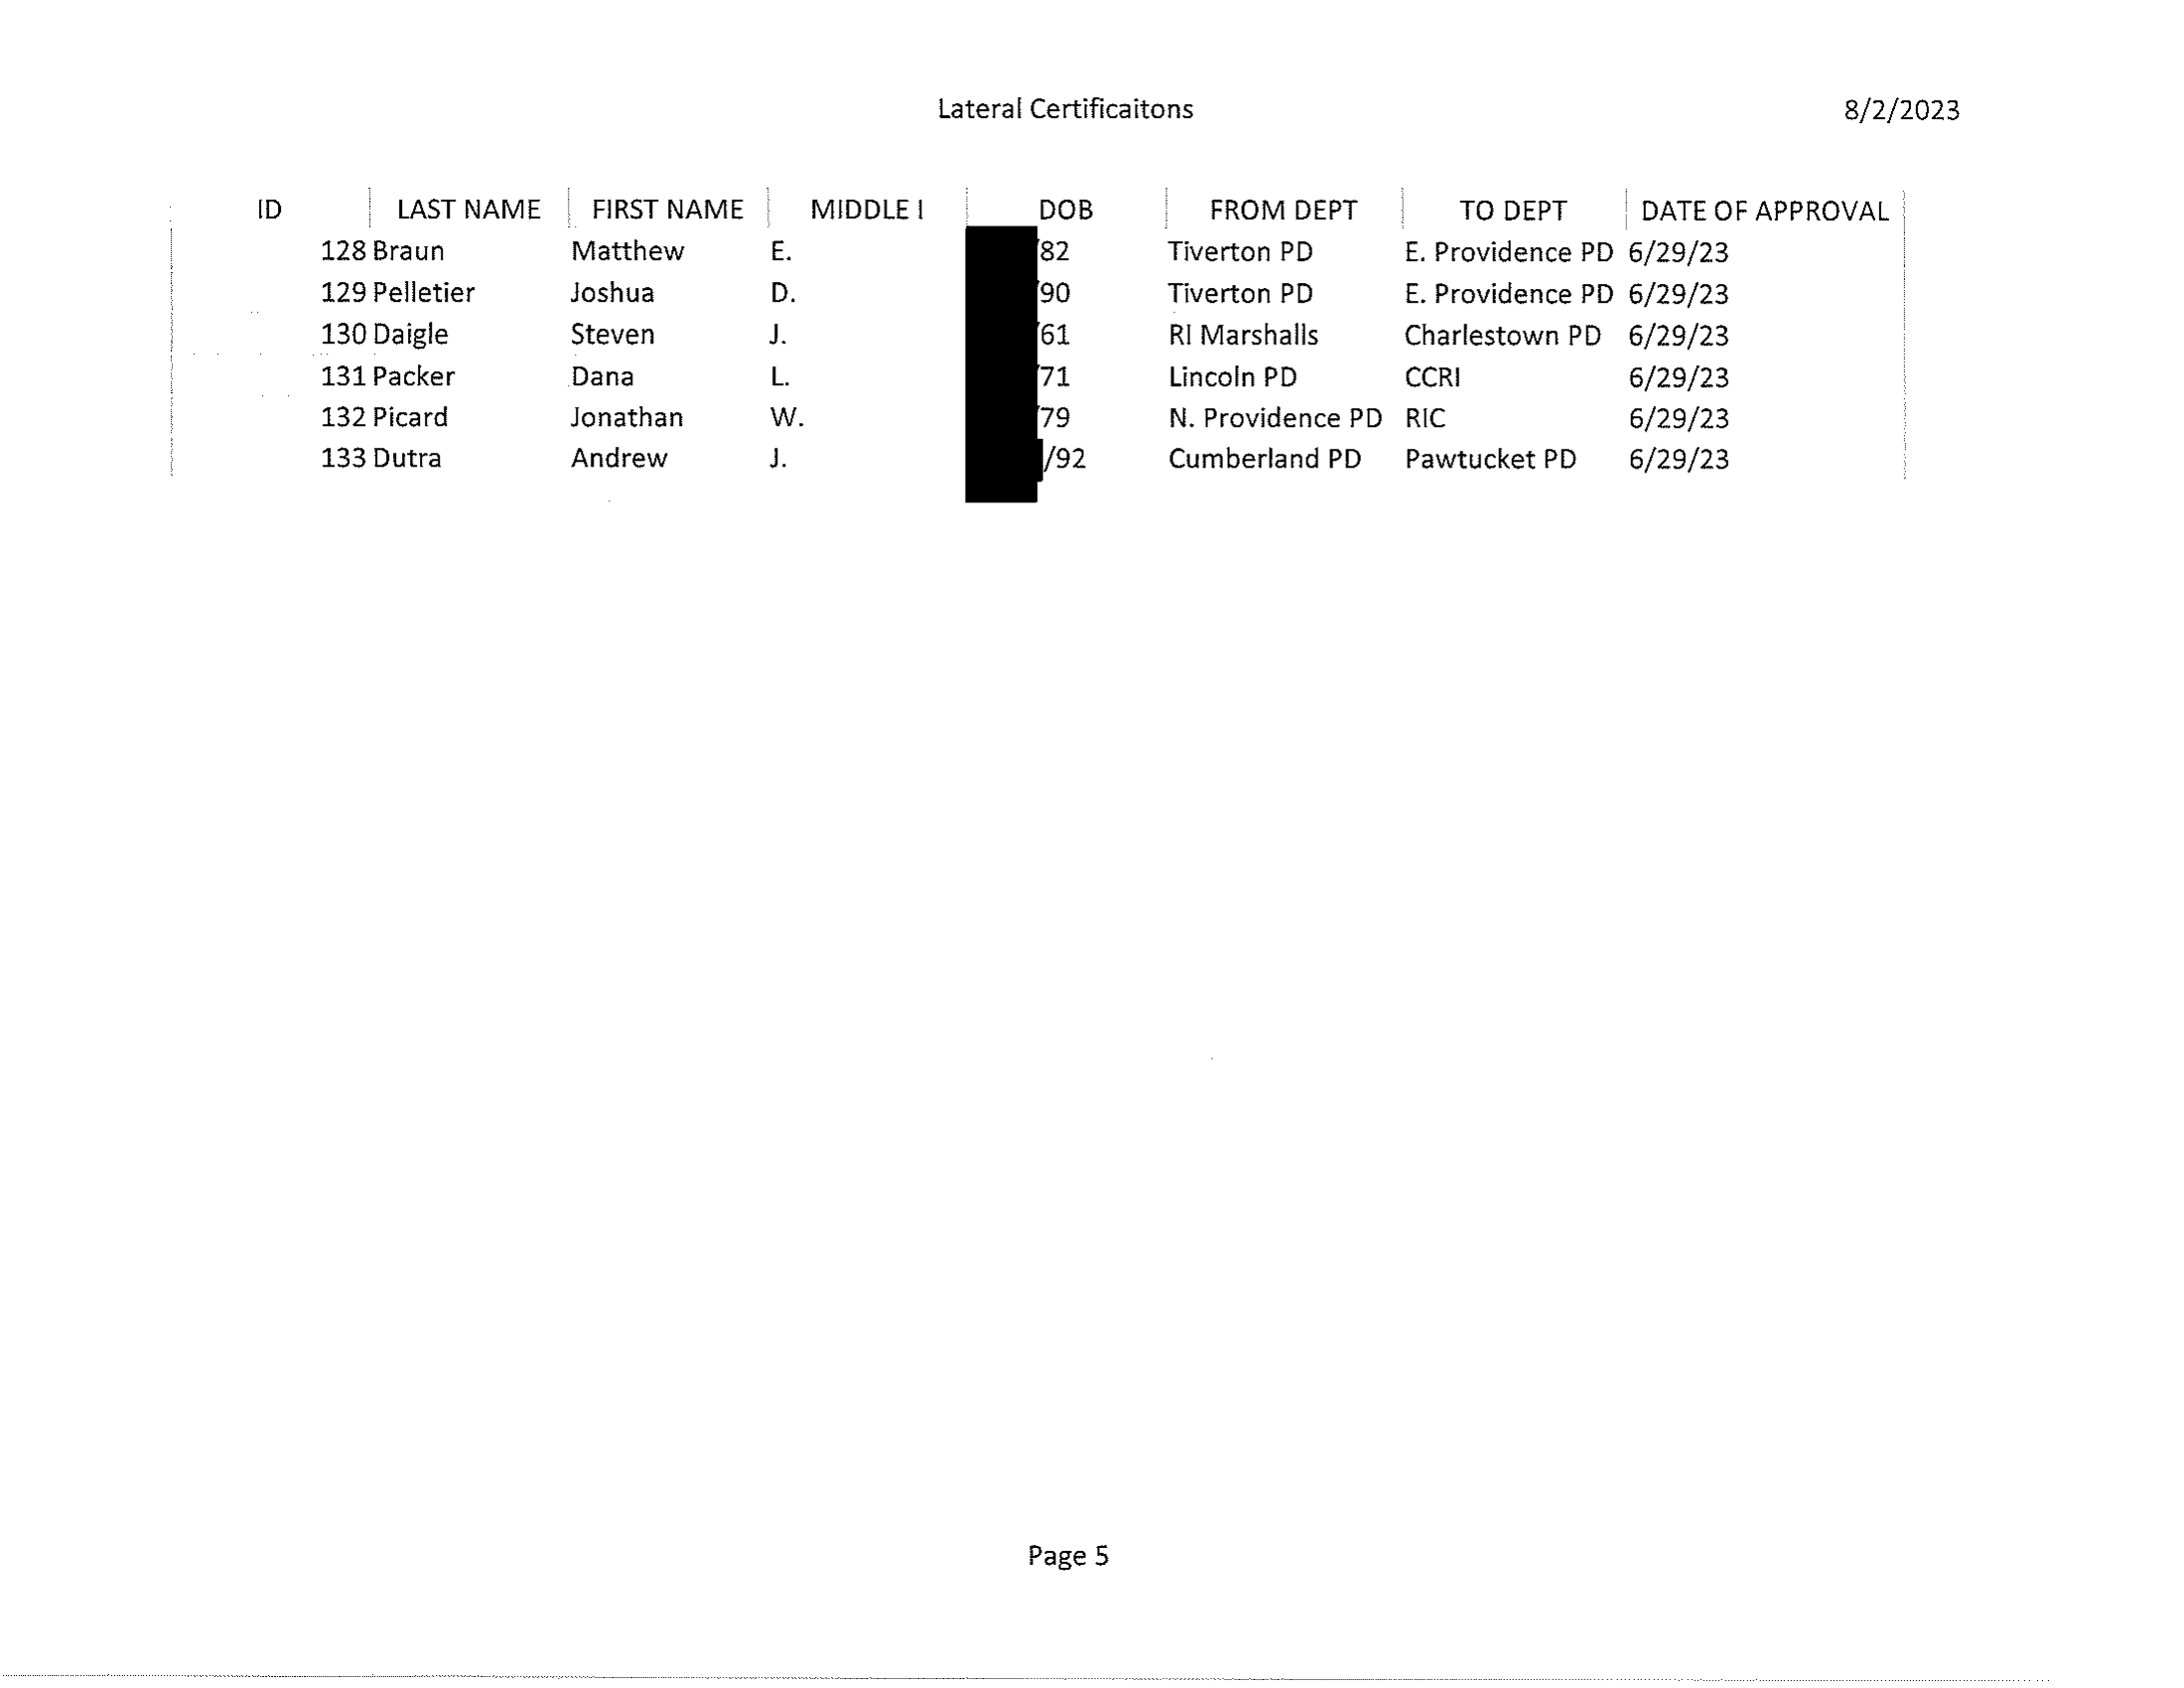

In [373]:
from IPython.display import display, Image
display(images[4])

In [374]:
bounds = reader.readtext(np.array(images[4]), min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.6, decoder='beamsearch', beamWidth=10)
bounds

[([[940, 94], [1208, 94], [1208, 126], [940, 126]],
  'Lateral Certificaitons',
  0.9999286572681765),
 ([[1852, 91], [1981, 91], [1981, 130], [1852, 130]],
  '8/2/2023',
  0.9999789264837695),
 ([[398, 196], [550, 196], [550, 226], [398, 226]],
  'LAST NAME',
  0.9872433291205259),
 ([[594, 196], [754, 196], [754, 226], [594, 226]],
  'FIRST NAME',
  0.863554744271695),
 ([[814, 196], [936, 196], [936, 226], [814, 226]],
  'MIDDLE [',
  0.7193533486584666),
 ([[1044, 196], [1106, 196], [1106, 226], [1044, 226]],
  'DOB',
  0.9999012360388236),
 ([[1216, 196], [1372, 196], [1372, 228], [1216, 228]],
  'FROM DEPT',
  0.9985881473401225),
 ([[1468, 198], [1582, 198], [1582, 228], [1468, 228]],
  'TO DEPT',
  0.7239984754261481),
 ([[1652, 198], [1908, 198], [1908, 228], [1652, 228]],
  'DATE OF APPROVAL',
  0.981147303386703),
 ([[320, 238], [450, 238], [450, 268], [320, 268]],
  '128 Braun',
  0.9943945119247214),
 ([[574, 238], [694, 238], [694, 268], [574, 268]],
  'Matthew',
  0.8477

In [375]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

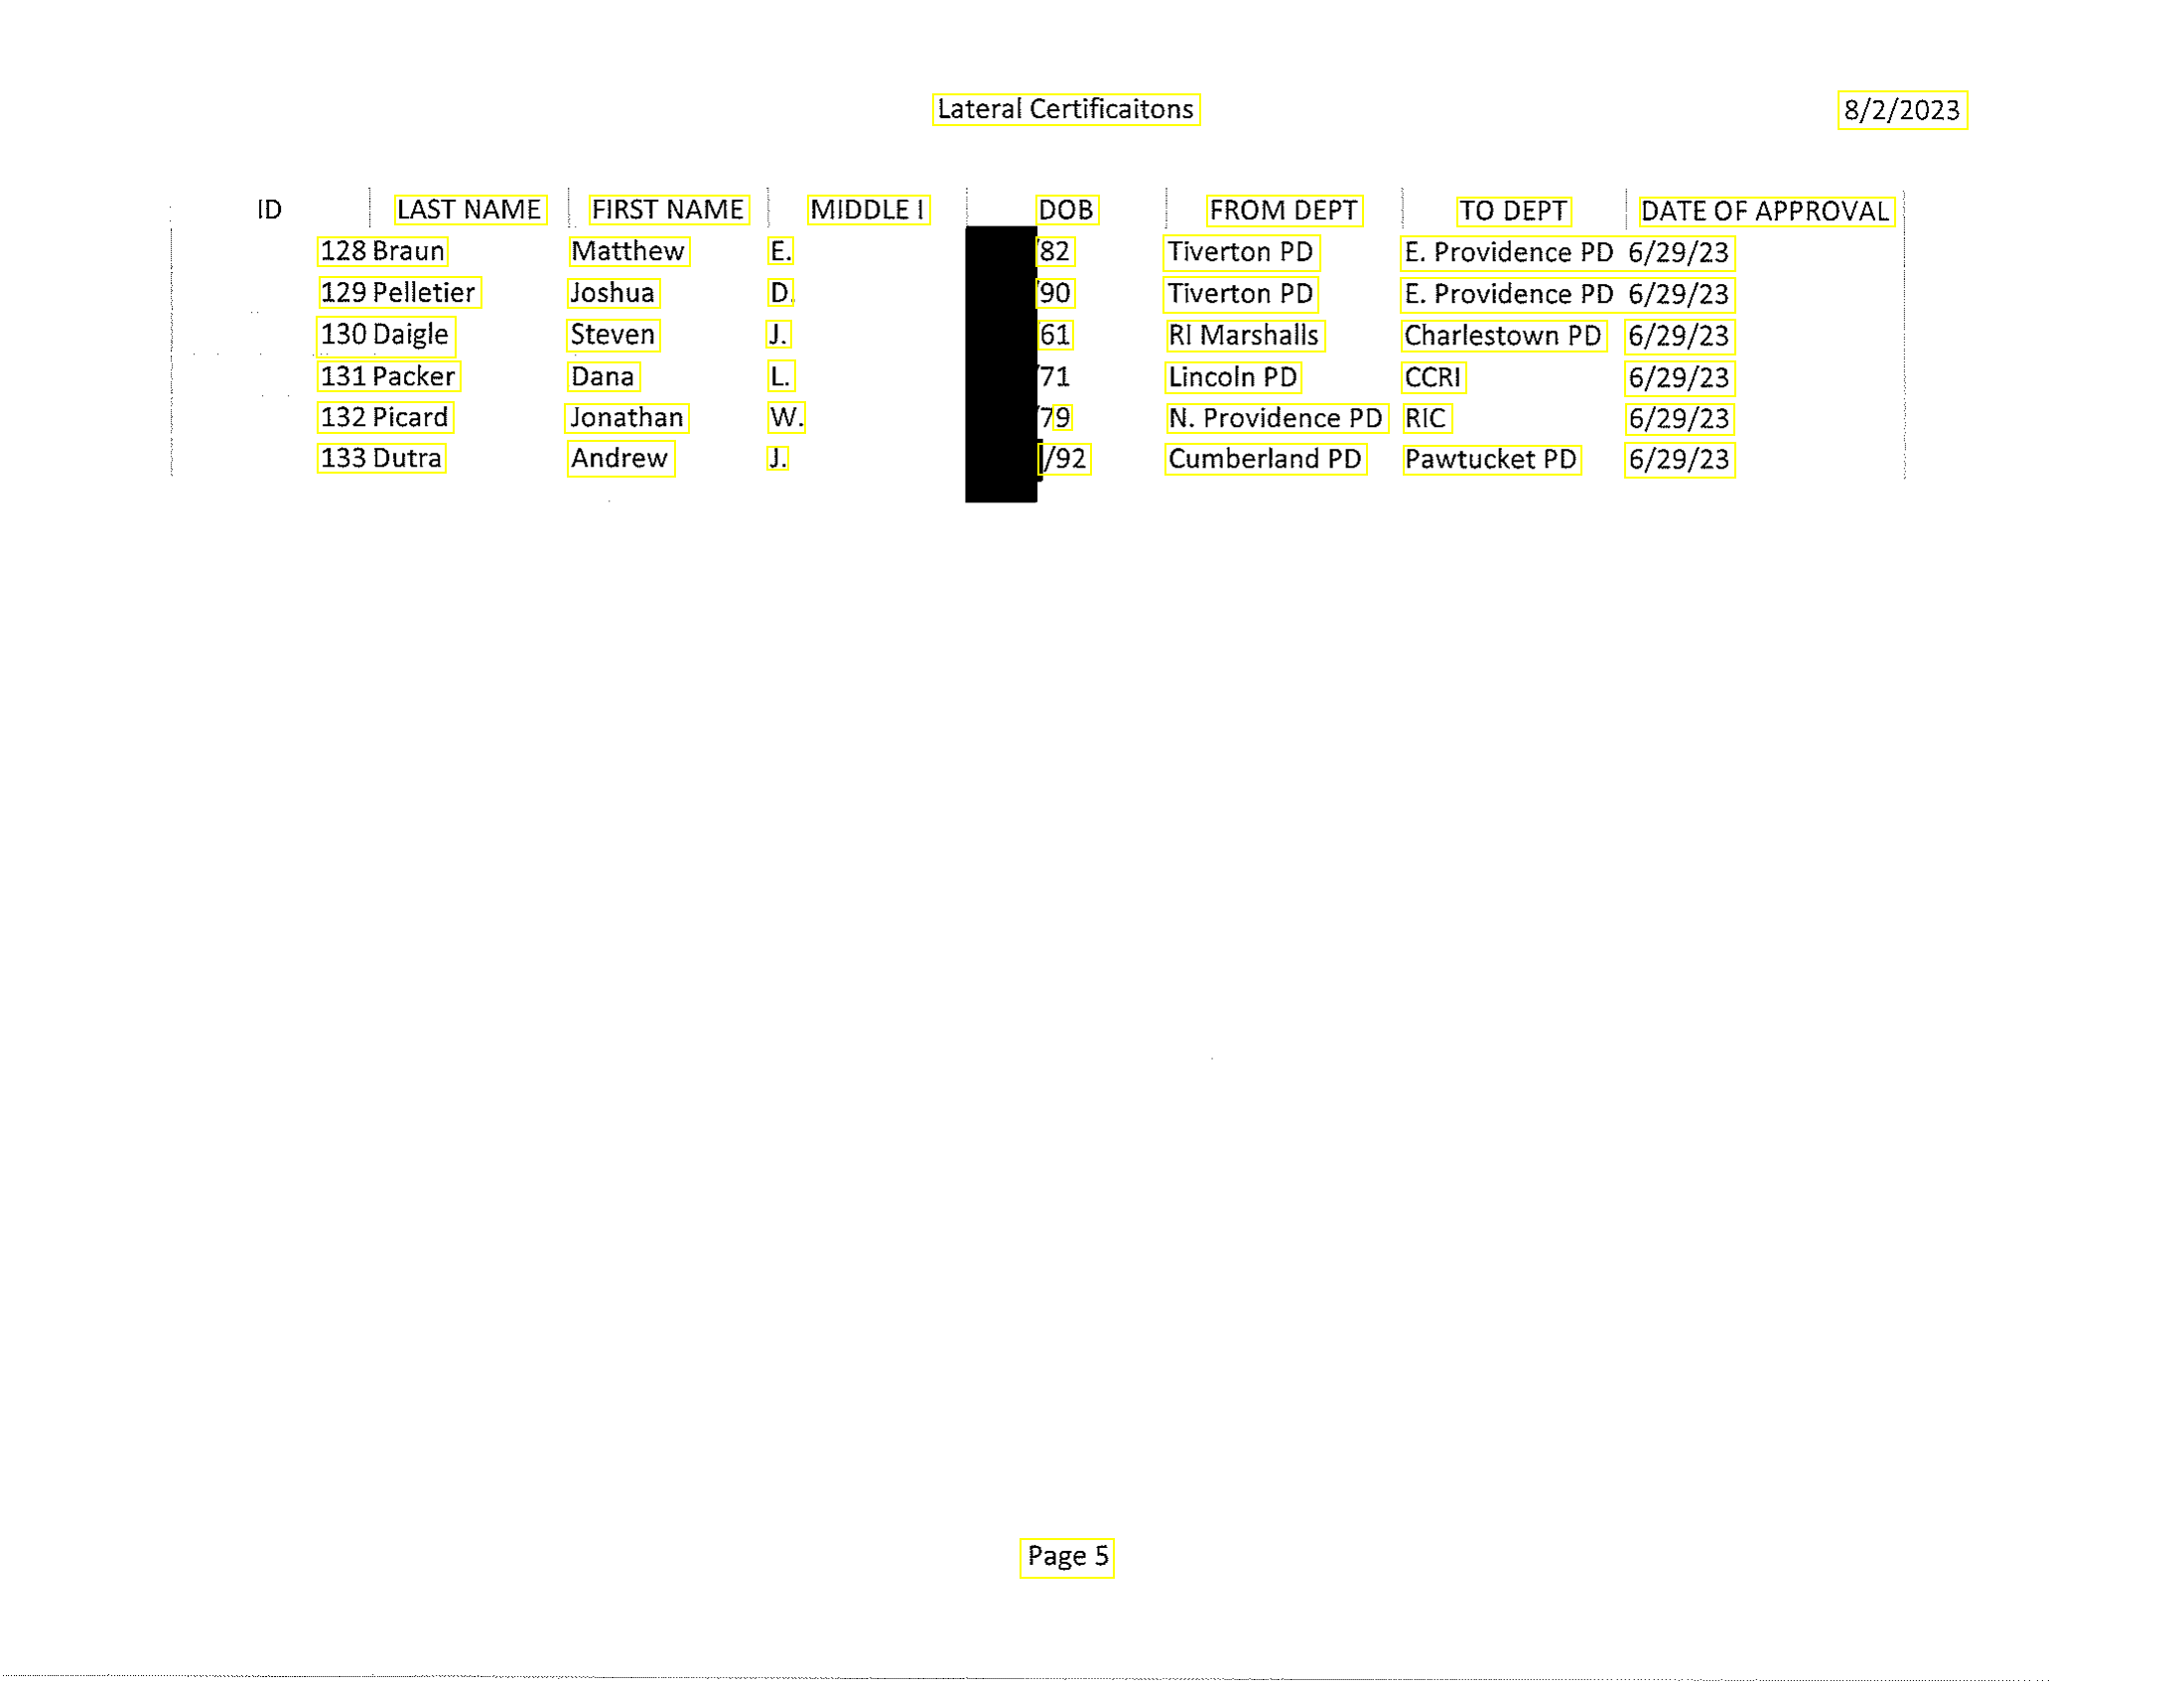

In [376]:
draw_boxes(images[4], bounds)

In [377]:
row_bounds = [[bound[0][0][1], bound[1], bound[2]] for bound in bounds if (bound[1] not in ['','"','M'] and bound[2] > 0.2)]
row_bounds

[[94, 'Lateral Certificaitons', 0.9999286572681765],
 [91, '8/2/2023', 0.9999789264837695],
 [196, 'LAST NAME', 0.9872433291205259],
 [196, 'FIRST NAME', 0.863554744271695],
 [196, 'MIDDLE [', 0.7193533486584666],
 [196, 'DOB', 0.9999012360388236],
 [196, 'FROM DEPT', 0.9985881473401225],
 [198, 'TO DEPT', 0.7239984754261481],
 [198, 'DATE OF APPROVAL', 0.981147303386703],
 [238, '128 Braun', 0.9943945119247214],
 [238, 'Matthew', 0.8477006304449151],
 [238, 'E.', 0.9105833569350865],
 [238, '182', 0.46764114654204597],
 [236, 'Tiverton PD', 0.9929758521793638],
 [237, 'E. Providence PD 6/29/23', 0.6638883918234357],
 [278, '129 Pelletier', 0.9998179103573723],
 [280, 'Joshua', 0.9999703130378771],
 [280, 'D', 0.9980791503459763],
 [280, '90', 0.9991011260922203],
 [278, 'Tiverton PD', 0.9993022752017438],
 [279, 'E: Providence PD 6/29/23', 0.804169093497448],
 [318, '130 Daigle', 0.7026112951228641],
 [321, 'Steven', 0.9999434485997903],
 [322, 'J.', 0.9664498776655767],
 [322, '61', 

In [378]:
rows = [[row_bounds[0][1]]]
for i in range(1,len(row_bounds)):
    if (row_bounds[i][0]-row_bounds[i-1][0]) < 10:
        rows[-1].append(row_bounds[i][1])
    else:
        rows.append([])
        rows[-1].append(row_bounds[i][1])
rows = rows[1:-1]

In [379]:
def date_addon():
    for i in range(len(rows)):
        if 'PD' in rows[i][-1] and rows[i][-1][-2:] != 'PD':
            print(rows[i][-1]) # boundary boxes with more than one value attached.
            rows[i].append(rows[i][-1][rows[i][-1].index('PD')+2:].strip())
            rows[i][-2] = rows[i][-2][:rows[i][-2].index('PD')+2]
        if 'P' in rows[i][-1] and rows[i][-1][-2:] != 'P':
            print(rows[i][-1]) # boundary boxes with more than one value attached.
            rows[i].append(rows[i][-1][rows[i][-1].index('P')+1:].strip())
            rows[i][-2] = rows[i][-2][:rows[i][-2].index('P')+1]

date_addon()
date_addon() # Rare instance if last 3 values in row are one single boundary box.

DATE OF APPROVAL
E. Providence PD 6/29/23
E: Providence PD 6/29/23
PROVAL


In [380]:
for row in rows[1:]:
    print(row)
    if len(row) == 6:
        row.insert(2, None)
    
    row.insert(0, int(row[0][:3].strip()))
    row[1] = row[1][3:].strip()
    row[-2], row[-3] = row[-2].replace(':', '.').replace('_', '.'), row[-3].replace(':', '.').replace('_', '.')
    if row[3] != None:
        row[3] = (row[3].replace(',','.').replace(':','.').replace('_','.').replace('s','.') + '.')[:2]
    row[4] = row[4][-2:]

['128 Braun', 'Matthew', 'E.', '182', 'Tiverton PD', 'E. Providence PD', '6/29/23']
['129 Pelletier', 'Joshua', 'D', '90', 'Tiverton PD', 'E: Providence PD', '6/29/23']
['130 Daigle', 'Steven', 'J.', '61', 'RI Marshalls', 'Charlestown PD', '6/29/23']
['131 Packer', 'Dana', 'L', 'Lincoln PD', 'CCRI', '6/29/23']
['132 Picard', 'Jonathan', 'W.', '9', 'N. Providence PD', 'RIC', '6/29/23']
['133 Dutra', 'Andrew', 'J.', '192', 'Cumberland PD', 'Pawtucket PD', '6/29/23']


In [381]:
rows_df = pd.DataFrame(rows[1:], columns=['ID', 'LAST NAME', 'FIRST NAME', 'MIDDLE I', 'DOB', 'FROM DEPT', 'TO DEPT', 'DATE OF APPROVAL'])
rows_df

,ID,LAST NAME,FIRST NAME,MIDDLE I,DOB,FROM DEPT,TO DEPT,DATE OF APPROVAL
0,128,Braun,Matthew,E.,82,Tiverton PD,E. Providence PD,6/29/23
1,129,Pelletier,Joshua,D.,90,Tiverton PD,E. Providence PD,6/29/23
2,130,Daigle,Steven,J.,61,RI Marshalls,Charlestown PD,6/29/23
3,131,Packer,Dana,None,L,Lincoln PD,CCRI,6/29/23
4,132,Picard,Jonathan,W.,9,N. Providence PD,RIC,6/29/23
5,133,Dutra,Andrew,J.,92,Cumberland PD,Pawtucket PD,6/29/23


In [382]:
rows_df.to_csv('RIMPTA_page5.csv')
print('done')

done


Retrieval Stage. Overall, using OCR paid off, but I still had to do some manual correction, mainly for the Middle Initial column (single character parsing was tougher for the model).

In [386]:
final = pd.read_csv('RIMPTA_page1.csv')
for i in range(2, 6):
    addon_page = pd.read_csv('RIMPTA_page'+str(i)+'.csv')
    final = pd.concat([final, addon_page])

final.drop(columns=final.columns[0], axis=1, inplace=True)
final

,ID,LAST NAME,FIRST NAME,MIDDLE I,DOB,FROM DEPT,TO DEPT,DATE OF APPROVAL
0,8,Akinrola,Michael,NaN,90,N. Smithfield PD,Central Falls PD,8/26/21
1,9,Bemis,Connor,R.,96,Warren PD,Warwick PD,6/24/21
2,10,Brothers,Brian,P.,93,W. Wawick PD,Cranston PD,6/24/21
3,11,Carreiro,Michael,D.,67,Westerly PD,URI PD,6/24/21
4,12,Cooper,Kayleigh,T.,95,Johnston PD,Cranston PD,6/24/21
...,...,...,...,...,...,...,...,...
1,129,Pelletier,Joshua,D.,90,Tiverton PD,E. Providence PD,6/29/23
2,130,Daigle,Steven,J.,61,RI Marshalls,Charlestown PD,6/29/23
3,131,Packer,Dana,NaN,L,Lincoln PD,CCRI,6/29/23
4,132,Picard,Jonathan,W.,9,N. Providence PD,RIC,6/29/23


In [387]:
final.to_csv('RIMPTA.csv')
print('done')

done
